In [3]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

# Load data
iris = np.genfromtxt('iris_2D_3c.csv', dtype=None, delimiter=',', skip_header=1)
X = torch.tensor(iris[:, 0:2], dtype=torch.float32)
y = torch.tensor(iris[:, 2], dtype=torch.int64)

# Define the model
class SoftmaxRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(SoftmaxRegression, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        return self.linear(x)

input_dim = X.shape[1]
output_dim = len(torch.unique(y))
model = SoftmaxRegression(input_dim, output_dim)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
max_epoch = 100
losses = []

for epoch in range(max_epoch):    
    # Zero the gradients
    optimizer.zero_grad()
    
    # Forward pass
    outputs = model(X)

    # Compute loss
    loss = criterion(outputs, y)
    losses.append(loss.item())
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()

print(model.linear.weight)
print(model.linear.bias)

Parameter containing:
tensor([[-0.1932, -0.5072],
        [ 0.0379, -0.0050],
        [ 0.1133, -0.2504]], requires_grad=True)
Parameter containing:
tensor([ 0.1456, -0.5337, -0.2864], requires_grad=True)


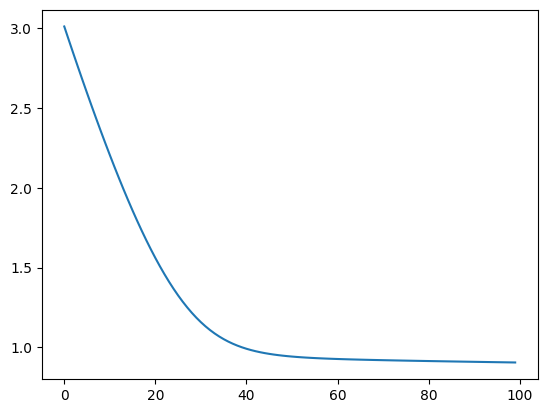

In [4]:
import matplotlib.pyplot as plt

plt.plot(losses)